In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (July 2018) 
#
# Plot correlation between reconstructed vs observed gene expression
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns

randomState = 123
from numpy.random import seed
seed(randomState)

In [3]:
# load arguments
estimated_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "estimated_test_t90_2layer_10latent.txt")
obsv_file = os.path.join(os.path.dirname(os.getcwd()), "data", "oxygen_level", "train_minO2.txt")

# output
fig_file = os.path.join(os.path.dirname(os.getcwd()), "viz", "oxygen_level", "Tybalt_2layer_transform_t90.png")

In [4]:
# read in data
estimated_data = pd.read_table(estimated_file, header = 0, sep = '\t', index_col = 0)
obsv_data = pd.read_table(obsv_file, header = 0, sep = '\t', index_col = 0)

estimated_data.columns = obsv_data.columns  #Add gene ids to merge on later

#obsv_data
estimated_data

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM1267087_HZI1950_Pae_G1a.CEL,0.686177,0.72357,0.437746,0.67743,0.439992,0.364563,0.50503,0.587372,0.641727,0.192211,...,0.35716,0.543123,0.601631,0.641289,0.669666,0.16932,0.427658,0.584807,0.765351,0.728943


In [5]:
# Average gene expression across samples
estimated_data_mean = estimated_data.mean(axis=0)
obsv_data_mean = obsv_data.mean(axis=0)

estimated_data_mean_df = pd.DataFrame(estimated_data_mean, index = estimated_data_mean.index, columns=['estimated'])
obsv_data_mean_df = pd.DataFrame(obsv_data_mean, index = obsv_data_mean.index, columns = ['observed'])

estimated_data_mean_df.head(5)
#obsv_data_mean_df.head(5)

,estimated
PA0001,0.686177
PA0002,0.723570
PA0003,0.437746
PA0004,0.677430
PA0005,0.439992


In [6]:
# Join 
X = pd.merge(estimated_data_mean_df, obsv_data_mean_df, left_index=True, right_index=True)
X.head(5)

,estimated,observed
PA0001,0.686177,0.704391
PA0002,0.723570,0.721766
PA0003,0.437746,0.394952
PA0004,0.677430,0.674845
PA0005,0.439992,0.428068


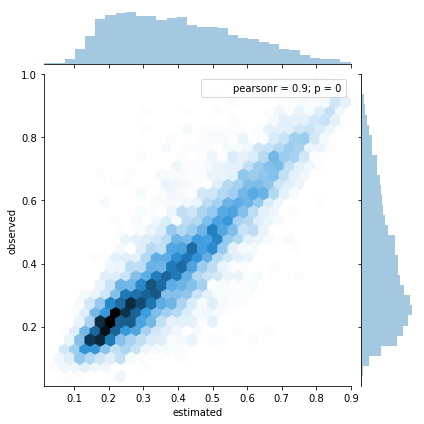

In [7]:
# Plot
fg=sns.jointplot(x='estimated', y='observed', data=X, kind='hex');
fg.savefig(fig_file)

In [8]:
# Calculate error: RMSE of estimated data and observed data per sample

# Note: estiamted and observed samples are not matched, so how do we compare them?
#rmse = np.ndarray(shape=(1, estimated_data.shape[1]))
#i = 0
#for col in estimated_data.columns:
#    rmse[0,i] = ((estimated_data[col] - obsv_data[col]) ** 2).mean() ** .5
#    i+=1
#rmse